In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Data/TMDB_all_movies.csv')

In [3]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'cast', 'director', 'director_of_photography', 'writers', 'producers',
       'music_composer'],
      dtype='object')

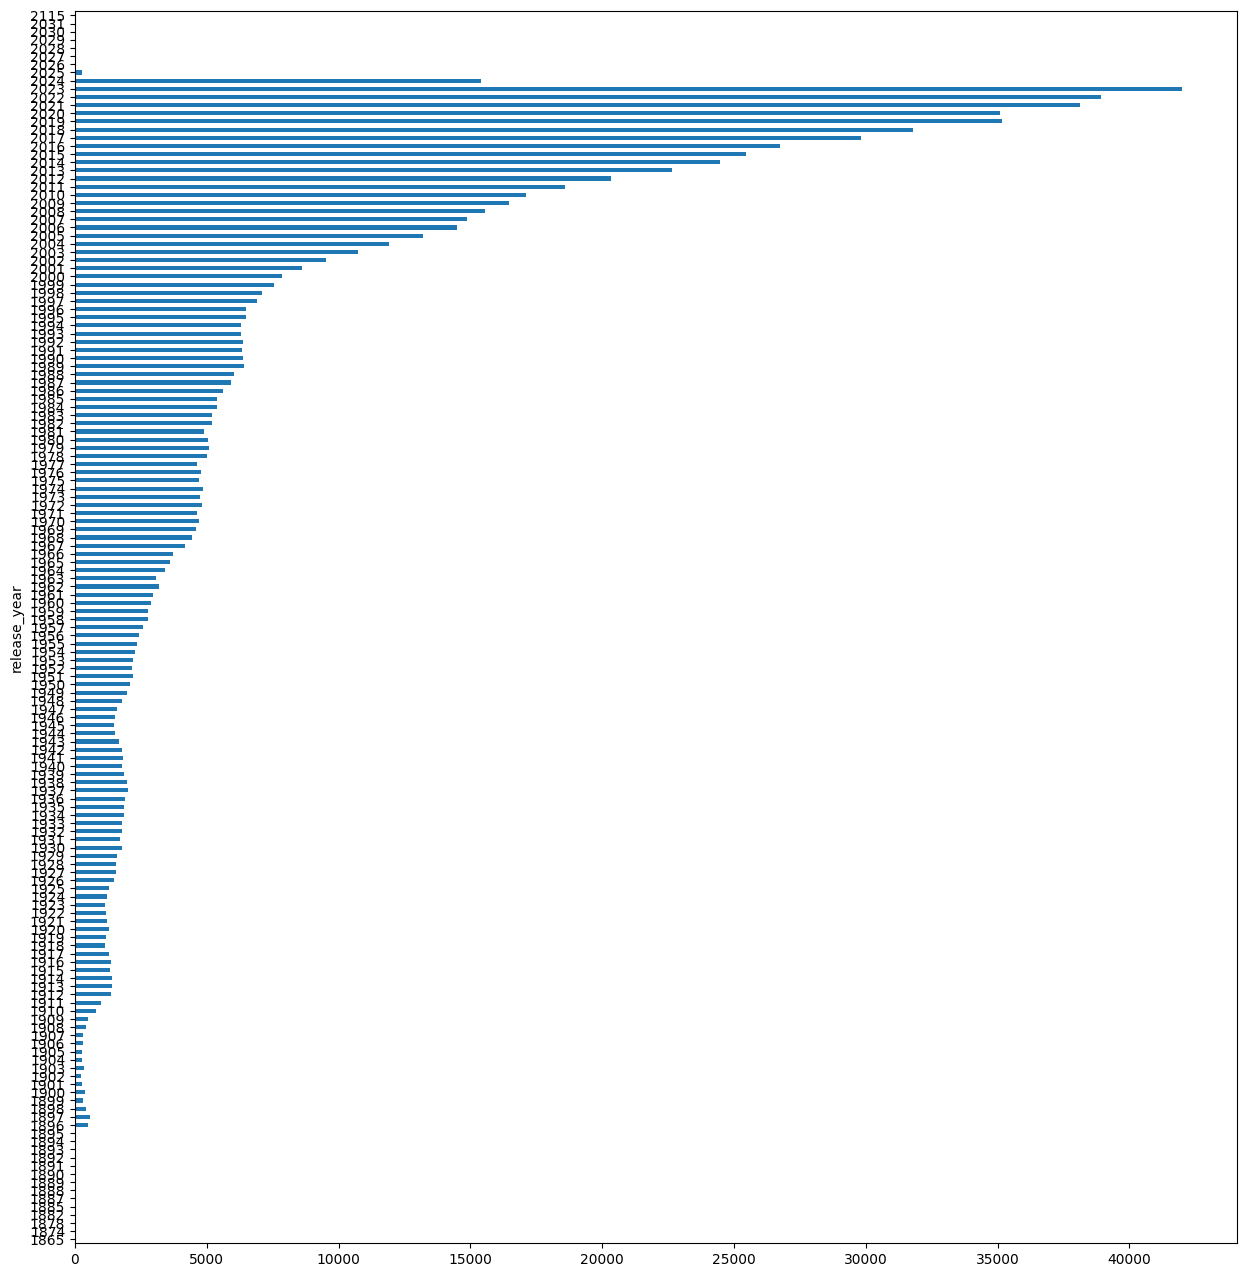

In [4]:
df['release_date'] = pd.to_datetime(df['release_date'])

df['release_year'] = df['release_date'].dt.year

# Loại bỏ các dòng chứa giá trị NaN hoặc vô hạn trong cột 'release_year'
df = df.dropna(subset=['release_year'])
df = df[np.isfinite(df['release_year'])]
df['release_year'] = df['release_year'].astype(int)

df['release_year'].value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [5]:
df['release_year'].value_counts().sort_index()

release_year
1865     1
1874     1
1878    26
1882     1
1885     1
        ..
2028     5
2029     2
2030     3
2031     2
2115     1
Name: count, Length: 151, dtype: int64

In [6]:
df = df[(df['release_year'] >= 1900) & (df['release_year'] <= 2024)]

In [7]:
df['release_year'].value_counts().sort_index()

release_year
1900      384
1901      279
1902      229
1903      344
1904      277
        ...  
2020    35079
2021    38136
2022    38933
2023    41997
2024    15413
Name: count, Length: 125, dtype: int64

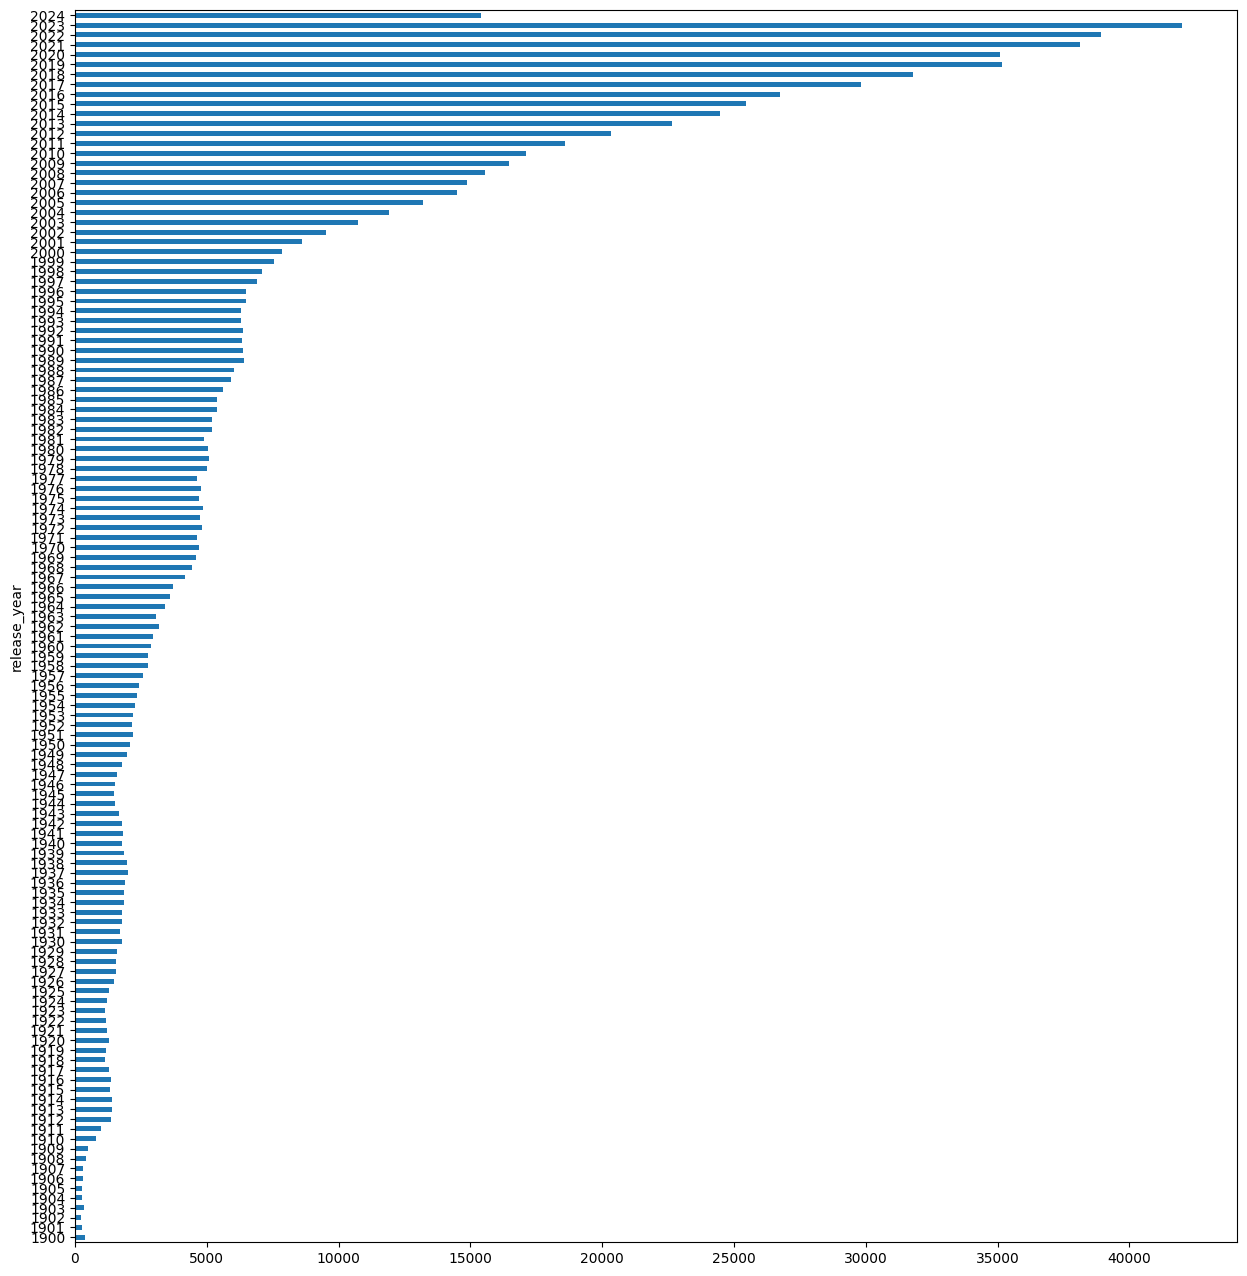

In [8]:
df['release_year'].value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [9]:
df = df[['title']]

In [12]:
# Đổi tên cột từ "title" thành "movie_title"
df.rename(columns={"title": "movie_title"}, inplace=True)

# Lưu DataFrame đã chỉnh sửa lại thành file CSV mới
df.to_csv("../../Data/main_data.csv", index=False)